In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [3]:
'.asdf'.split('.')

['', 'asdf']

# Virtual Contour Plot

In [2]:
base_folder = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/may_29_sims/virtual_contour_plot_sims_1622328230/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    x_variable = 'virtual_pop_size'
    x_val = float(fname.split(x_variable+'_')[1].split('_')[0])
    y_variable = 'virtual_noncompliance'
    y_val = float(fname.split(y_variable+'_')[1].split('.dill')[0])
    
    return y_val, x_val


def get_Y_values():
    return np.linspace(PARAM_BOUNDS['virtual_noncompliance'][0], PARAM_BOUNDS['virtual_noncompliance'][1], 13)

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(PARAM_BOUNDS['virtual_pop_size'][0], PARAM_BOUNDS['virtual_pop_size'][1], 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'virtual_pop_size': [], 'virtual_noncompliance': []}
    for fpath in sim_fpaths:
#         print(fpath)
        params = map_fpath_to_params(fpath)
        sim_params['virtual_noncompliance'].append(params[0])
        sim_params['virtual_pop_size'].append(params[1])

    assert(len(set(sim_params['virtual_noncompliance'])) == len(set(sim_params['virtual_pop_size'])) == 13)

    Y = get_Y_values()
    X = get_X_values()

    X_val_to_idx = {x_val:idx for idx, x_val in enumerate(X)}
    Y_val_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = X_val_to_idx[sim_params['virtual_pop_size'][sim_idx]]
        y_idx = Y_val_to_idx[sim_params['virtual_noncompliance'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['vir_cornell_inf_50'])
    
    return X, Y, Z



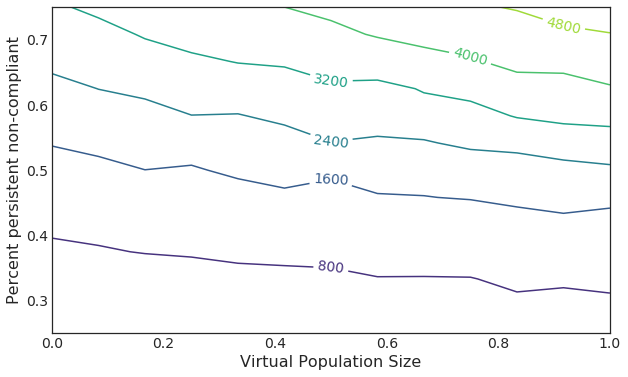

In [5]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

X,Y,Z = load_contour_plot_data()



plt.figure(figsize=(10,6))
plt.ylabel('Percent persistent non-compliant')
plt.xlabel('Virtual Population Size')
# levels = np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10)
CS = plt.contour(X,Y,Z.T, cmap='viridis')
plt.clabel(CS, inline=1, fmt='%d', fontsize=14)
plt.show()



# Test Compliance, sensitivity contour plot

### Nominal

In [56]:
base_folder = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/test_comp_sens_contour_sims_1622090413/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    x_variable = 'test_noncompliance'
    x_val = float(fname.split(x_variable+'_')[1].split('_')[0])
    y_variable = 'test_sensitivity'
    y_val = float(fname.split(y_variable+'_')[1].split('.dill')[0])
    
    return y_val, x_val


def get_Y_values():
    return np.linspace(PARAM_BOUNDS['test_sensitivity'][0], PARAM_BOUNDS['test_sensitivity'][1], 13)

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(PARAM_BOUNDS['test_noncompliance'][0], PARAM_BOUNDS['test_noncompliance'][1], 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'test_noncompliance': [], 'test_sensitivity': []}
    for fpath in sim_fpaths:
#         print(fpath)
        params = map_fpath_to_params(fpath)
        sim_params['test_sensitivity'].append(params[0])
        sim_params['test_noncompliance'].append(params[1])

    assert(len(set(sim_params['test_sensitivity'])) == len(set(sim_params['test_noncompliance'])) == 13)

    Y = get_Y_values()
    X = get_X_values()

    X_val_to_idx = {x_val:idx for idx, x_val in enumerate(X)}
    Y_val_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = X_val_to_idx[sim_params['test_noncompliance'][sim_idx]]
        y_idx = Y_val_to_idx[sim_params['test_sensitivity'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['res_cornell_inf_50'])
    
    return X, Y, Z



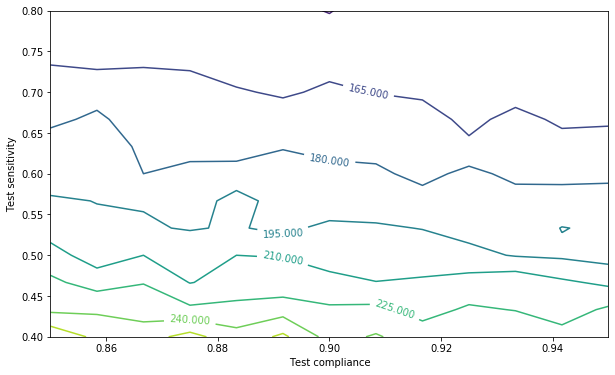

In [57]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

X,Y,Z = load_contour_plot_data()

X = [1-x for x in X]

# X,Y,np.matrix(Z)

plt.figure(figsize=(10,6))
plt.ylabel('Test sensitivity')
plt.xlabel('Test compliance')
# levels = np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10)
CS = plt.contour(X,Y,Z.T)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()



### Pessimistic

In [9]:
base_folder = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/may_29_sims/test_comp_sens_pess_contour_sims_1622328248/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    x_variable = 'test_noncompliance'
    x_val = float(fname.split(x_variable+'_')[1].split('_')[0])
    y_variable = 'test_sensitivity'
    y_val = float(fname.split(y_variable+'_')[1].split('.dill')[0])
    
    return y_val, x_val


def get_Y_values():
    return np.linspace(PARAM_BOUNDS['test_sensitivity'][0], PARAM_BOUNDS['test_sensitivity'][1], 13)

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(0.01, 0.5, 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'test_noncompliance': [], 'test_sensitivity': []}
    for fpath in sim_fpaths:
#         print(fpath)
        params = map_fpath_to_params(fpath)
        sim_params['test_sensitivity'].append(params[0])
        sim_params['test_noncompliance'].append(params[1])

    assert(len(set(sim_params['test_sensitivity'])) == len(set(sim_params['test_noncompliance'])) == 13)

    Y = get_Y_values()
    X = get_X_values()

    X_val_to_idx = {x_val:idx for idx, x_val in enumerate(X)}
    Y_val_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = X_val_to_idx[sim_params['test_noncompliance'][sim_idx]]
        y_idx = Y_val_to_idx[sim_params['test_sensitivity'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['res_cornell_inf_50'])
    
    return X, Y, Z


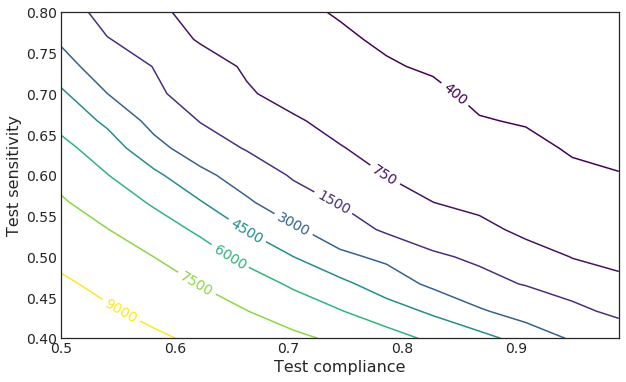

In [12]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

X,Y,Z = load_contour_plot_data()

X = [1-x for x in X]

# X,Y,np.matrix(Z)

plt.figure(figsize=(10,6))
plt.ylabel('Test sensitivity')
plt.xlabel('Test compliance')
# levels = np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10)
# CS = plt.contour(X,Y,Z.T, levels=[400, 800, 1600, 3200])
CS = plt.contour(X,Y,Z.T, cmap='viridis', levels=[400, 750, 1500, 3000, 4500, 6000, 7500, 9000])
plt.clabel(CS, inline=1, fmt='%d', fontsize=14)
plt.show()
